In [77]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import re
import os


NAME="result-1-500"

RESULTDIR="/home/pcl/8LStudentYuHaitao/tmp/sfp/code/sfp_eval/analysis/"+NAME

RESULTDIR2="/home/pcl/8LStudentYuHaitao/tmp/sfp/code/sfp_eval/analysis/result/"

result=[]


for root, dirs, files in os.walk(RESULTDIR):
    for name in files:
        print(name)
        path2 = RESULTDIR2 + name
        if not os.path.exists(path2):
            continue
        lines = open(path2).readlines()
        if len(lines)==0:
            continue
        lb_prefix_overhead = int(lines[0])
        print(lb_prefix_overhead)
        path = os.path.join(root, name)
        print(path)
        ns = name.split(".")
        if ns[1]=='txt':
            asn = int(ns[0])
            lines = open(path).readlines()
            if len(lines)<4:
                print("lines < 4")
            else:
                P = float(lines[1].split()[-1])
                msgover = float(lines[2].split()[-1])
                F = float(lines[3].split()[-1])
                result.append((asn,P,F, msgover, lb_prefix_overhead))


print(result)


8703.txt
6568238
/home/pcl/8LStudentYuHaitao/tmp/sfp/code/sfp_eval/analysis/result-1-500/8703.txt
42176.txt
125023
/home/pcl/8LStudentYuHaitao/tmp/sfp/code/sfp_eval/analysis/result-1-500/42176.txt
34276.txt
123581
/home/pcl/8LStudentYuHaitao/tmp/sfp/code/sfp_eval/analysis/result-1-500/34276.txt
19721.txt
3584015
/home/pcl/8LStudentYuHaitao/tmp/sfp/code/sfp_eval/analysis/result-1-500/19721.txt
38469.txt
561260
/home/pcl/8LStudentYuHaitao/tmp/sfp/code/sfp_eval/analysis/result-1-500/38469.txt
29889.txt
248021
/home/pcl/8LStudentYuHaitao/tmp/sfp/code/sfp_eval/analysis/result-1-500/29889.txt
40039.txt
123795
/home/pcl/8LStudentYuHaitao/tmp/sfp/code/sfp_eval/analysis/result-1-500/40039.txt
41795.txt
247443
/home/pcl/8LStudentYuHaitao/tmp/sfp/code/sfp_eval/analysis/result-1-500/41795.txt
55048.txt
281431
/home/pcl/8LStudentYuHaitao/tmp/sfp/code/sfp_eval/analysis/result-1-500/55048.txt
88.txt
46785038
/home/pcl/8LStudentYuHaitao/tmp/sfp/code/sfp_eval/analysis/result-1-500/88.txt
30484.txt
1237

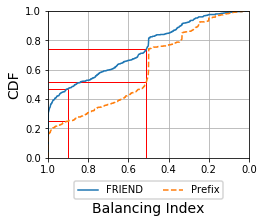

In [78]:


plt.rcParams["lines.linewidth"]=1.5
plt.rcParams["patch.linewidth"]=1.5

import numpy as np

c0="AS"
c1="Prefix-based LB Index"
c2="FRIEND-based LB Index"
c3="FRIEND Message Overhead"
c4="Prefix-based Message Overhead"
# df = pd.DataFrame(result, columns=[c0,c1,c2, c3, c4], dtype=float)

# df.to_csv("csv/loadbalance.csv",index=False)
df = pd.read_csv("csv/loadbalance.csv")


width=3.6
height = width*3/4
fig=plt.figure(figsize=(width,height))

a=-df[c2]
# a.hist(cumulative = True,density=True, histtype='step',bins=500,label="FRIEND", range= (-1,0.1))
x = np.linspace(-1,0.1,1000)
s = a.count()
y = [a[a<v].count()/s for v in x]
plt.plot(x,y, linestyle="-",label="FRIEND",linewidth=1.5)

a=-df[c1]
# a.hist(cumulative = True,density=True, histtype='step',bins=500,label="Prefix", range= (-1,0.1))
# x = np.linspace(-1,0.1,100)
s = a.count()
y1 = [a[a<v].count()/s for v in x]
plt.plot(x,y1, linestyle="--",label="Prefix",linewidth=1.5)

i = np.where(x>-0.9)[0][0]
x0=x[i]
plt.vlines(x0, 0,y[i], color='r',linewidth=1)
plt.hlines(y[i], -1,x0, color='r',linewidth=1)
plt.hlines(y1[i], -1,x0, color='r',linewidth=1)

i = np.where(x>-0.512)[0][0]
x0=x[i]
plt.vlines(x0, 0,y[i], color='r',linewidth=1)
plt.hlines(y[i], -1,x0, color='r',linewidth=1)
plt.hlines(y1[i], -1,x0, color='r',linewidth=1)

a = np.around(np.linspace(1,0,6), decimals=1)
plt.xticks(np.linspace(-1,0,6), a)
plt.xlabel("Balancing Index", fontsize=14)
plt.gca().xaxis.set_label_coords(0.5, -0.30)
plt.ylabel("CDF", fontsize=14)
plt.xlim([-1,0])
plt.ylim([0,1])
plt.grid()

# plt.legend(loc='lower right')
plt.legend(loc='center',bbox_to_anchor=(0.5,-0.22), ncol=2)

fig.savefig("result/%s-bindex-cdf.pdf"%NAME,dpi=300, bbox_inches='tight')

# df[c0]=df[c0].astype(int)
# sns.boxplot(x=c0,y=c1,data=df)
# # plt.show()
# plt.savefig("result/%s-prefix.pdf"%NAME,dpi=300, bbox_inches='tight')


# plt.clf()
# sns.boxplot(x=c0,y=c2,data=df)
# # plt.show()
# plt.savefig("result/%s-friend.pdf"%NAME,dpi=300, bbox_inches='tight')

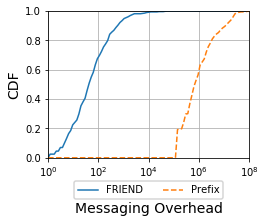

In [79]:
fig=plt.figure(figsize=(width,height))

df=df[df[c3]>0]

plt.clf()
a=np.log10(df[c3])
# a.hist(cumulative = True,density=True, histtype='step',bins=500,label="FRIEND", range=(0,8.1))
x = np.linspace(0, 8.1,100)
s = a.count()
y = [a[a<v].count()/s for v in x]
plt.plot(x,y, linestyle="-",label="FRIEND")


a=np.log10(df[c4])
# a.hist(cumulative = True,density=True, histtype='step',bins=500,label="Prefix-based", range=(0,8.1))
s = a.count()
y = [a[a<v].count()/s for v in x]
plt.plot(x,y, linestyle="--",label="Prefix")


plt.xlabel("Messaging Overhead",fontsize=14)
plt.gca().xaxis.set_label_coords(0.5, -0.30)
plt.xlim([0,8])
plt.ylabel("CDF",fontsize=14)
plt.ylim([0,1])
plt.grid()

plt.xticks(np.linspace(0,8,5), ["$10^%d$"%i for i in range(0,9,2)])

# plt.axes().set_xscale('log')
# plt.grid(False)
plt.legend(loc='center',bbox_to_anchor=(0.5,-0.22), ncol=2)

fig.savefig("result/%s-msgoverhead-cdf.pdf"%NAME,dpi=300, bbox_inches='tight')

In [80]:
len(df)

486